In [1]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [2]:
import keras
from matplotlib import pyplot as plt

load mnist into keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(8, 2, input_shape(28, 28, 1)),
    keras.layers.MaxPooling2D(8),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\Dennis\Documents\Coding\Handwritten-Digit-Recognizer\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
history = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test),
    epochs=20,
    
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8157 - loss: 0.7150 - val_accuracy: 0.9126 - val_loss: 0.3115
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9125 - loss: 0.3129 - val_accuracy: 0.9208 - val_loss: 0.2811
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9215 - loss: 0.2807 - val_accuracy: 0.9239 - val_loss: 0.2753
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9234 - loss: 0.2773 - val_accuracy: 0.9247 - val_loss: 0.2676
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9271 - loss: 0.2595 - val_accuracy: 0.9252 - val_loss: 0.2676
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9281 - loss: 0.2620 - val_accuracy: 0.9240 - val_loss: 0.2699
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9280 - loss: 0.2604 - val_accuracy: 0.9265 - val_loss: 0.2641
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9300 - loss: 0.2520 - 

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9171 - loss: 0.3037


Test accuracy: 0.9283000230789185


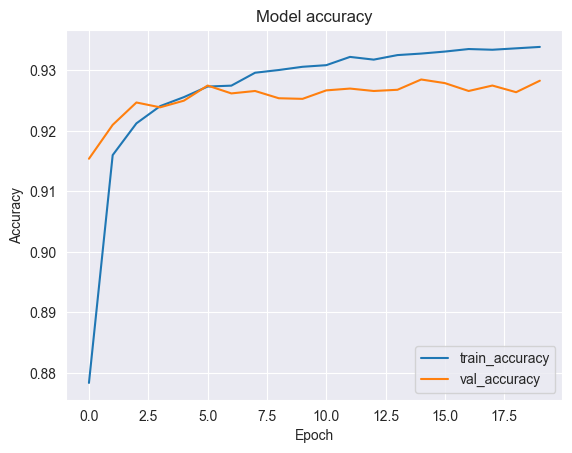

In [10]:
print('Test accuracy:', accuracy)

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [14]:
MODEL_NAME = 'nn'
model.save(f'models/{MODEL_NAME}.keras')
